# Book Recommendation System

### Importing The Necessary Python Library

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv("books.csv", error_bad_lines=False)

df.head(10)

C:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,Son & Ferguson,0,851742718,9.78E+12,eng,49,0,0,05-01-1977,Brown Son & Ferguson Ltd.
1,22128,Patriots (The Coming Collapse),James Wesley,Rawles,3.63,156384155X,9.78E+12,eng,342,38,4,1/15/1999,Huntington House Publishers
2,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,one of the founding members of this Tolkien w...,3.58,1593600119,9.78E+12,eng,400,26,4,04-06-2004,Cold Spring Press
3,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner,Jr./Sam B. Warner,3.58,674842111,9.78E+12,en-US,236,61,6,4/20/2004,Harvard University Press
4,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5,198145047,9.78E+12,grc,364,0,0,2/22/1922,Oxford University Press USA,NaN
5,2560,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,5,382960226X,9.78E+12,eng,83,1,0,09-01-2006,Schirmer Mosel,NaN
6,2843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5,439271711,9.78E+12,eng,32,4,1,01-01-2002,Teaching Resources,NaN
7,4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5,738511676,9.78E+12,eng,128,2,0,3/17/2003,Arcadia Publishing,NaN
8,14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5,744002354,9.78E+12,eng,128,2,0,03-06-2003,BradyGames,NaN
9,17224,The Diamond Color Meditation: Color Pathway to...,John Diamond,5,1890995525,9.78E+12,eng,74,5,3,02-01-2006,Square One Publishers,NaN


### EDA

In [71]:
df.drop("Unnamed: 12", axis=1, inplace=True)

In [72]:
df.head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,Son & Ferguson,0,851742718,9.78E+12,eng,49,0,0,05-01-1977
1,22128,Patriots (The Coming Collapse),James Wesley,Rawles,3.63,156384155X,9.78E+12,eng,342,38,4,1/15/1999
2,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,one of the founding members of this Tolkien w...,3.58,1593600119,9.78E+12,eng,400,26,4,04-06-2004
3,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner,Jr./Sam B. Warner,3.58,674842111,9.78E+12,en-US,236,61,6,4/20/2004
4,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5,198145047,9.78E+12,grc,364,0,0,2/22/1922,Oxford University Press USA
5,2560,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,5,382960226X,9.78E+12,eng,83,1,0,09-01-2006,Schirmer Mosel
6,2843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5,439271711,9.78E+12,eng,32,4,1,01-01-2002,Teaching Resources
7,4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5,738511676,9.78E+12,eng,128,2,0,3/17/2003,Arcadia Publishing
8,14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5,744002354,9.78E+12,eng,128,2,0,03-06-2003,BradyGames
9,17224,The Diamond Color Meditation: Color Pathway to...,John Diamond,5,1890995525,9.78E+12,eng,74,5,3,02-01-2006,Square One Publishers


In [73]:
## Checking the missing values

df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [74]:
df.describe()

,bookID,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,1.793649e+04,541.864474
std,13093.358023,1.124794e+05,2576.174610
min,1.000000,0.000000e+00,0.000000
25%,10287.000000,1.040000e+02,9.000000
50%,20287.000000,7.450000e+02,47.000000
75%,32104.500000,4.993500e+03,237.500000
max,45641.000000,4.597666e+06,94265.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7   num_pages           11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.0+ MB


In [76]:
top_ten = df[df["ratings_count"]>1000000]

top_ten["average_rating"] = top_ten["average_rating"].astype('float')

C:\Users\Acer\AppData\Local\Temp\ipykernel_972\1611293647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_ten["average_rating"] = top_ten["average_rating"].astype('float')


In [77]:
top_ten.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 110 to 10147
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              30 non-null     int64  
 1   title               30 non-null     object 
 2   authors             30 non-null     object 
 3   average_rating      30 non-null     float64
 4   isbn                30 non-null     object 
 5   isbn13              30 non-null     object 
 6   language_code       30 non-null     object 
 7   num_pages           30 non-null     object 
 8   ratings_count       30 non-null     int64  
 9   text_reviews_count  30 non-null     int64  
 10  publication_date    30 non-null     object 
 11  publisher           30 non-null     object 
dtypes: float64(1), int64(3), object(8)
memory usage: 3.0+ KB


In [78]:
top_ten["average_rating"] = top_ten["average_rating"].astype('int')

C:\Users\Acer\AppData\Local\Temp\ipykernel_972\856717998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_ten["average_rating"] = top_ten["average_rating"].astype('int')


<AxesSubplot:xlabel='average_rating', ylabel='title'>

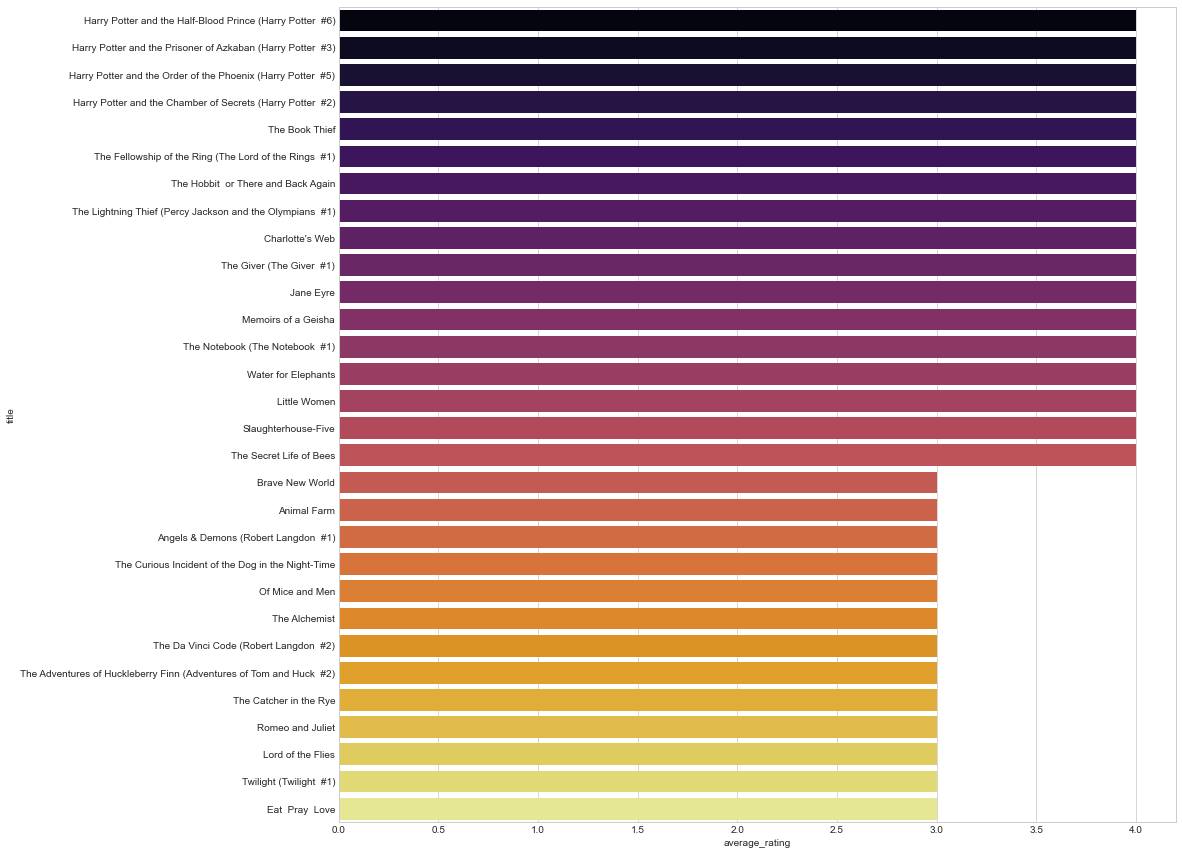

In [79]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15, 15))
sns.barplot(x="average_rating", y="title", data=top_ten, palette='inferno')

<AxesSubplot:xlabel='average_rating', ylabel='title'>

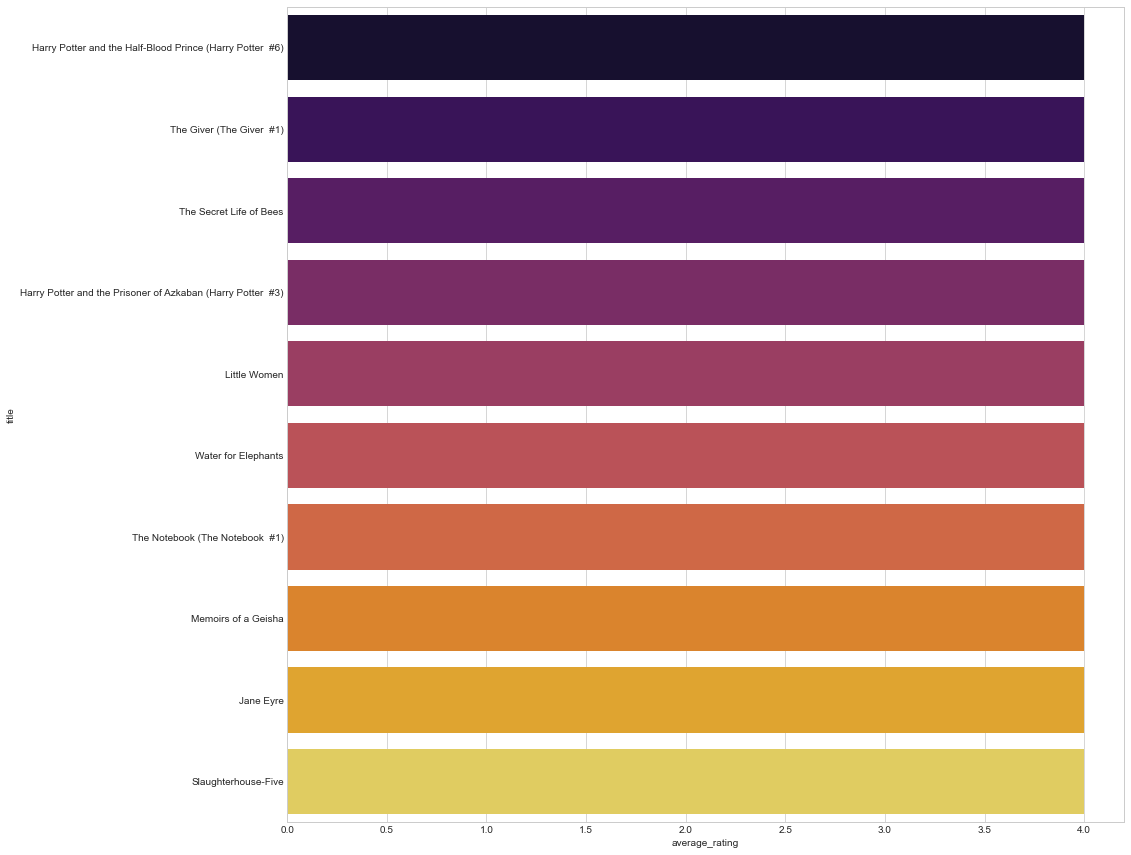

In [80]:
top_ten = top_ten.sort_values(by='average_rating', ascending=False).head(10)

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15, 15))
sns.barplot(x="average_rating", y="title", data=top_ten, palette='inferno')

In [81]:
book_aut = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')

In [82]:
book_aut

,title
authors,
P.G. Wodehouse,40
Stephen King,40
Rumiko Takahashi,39
Orson Scott Card,35
Agatha Christie,33
Piers Anthony,30
Mercedes Lackey,29
Sandra Brown,29
Dick Francis,28


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


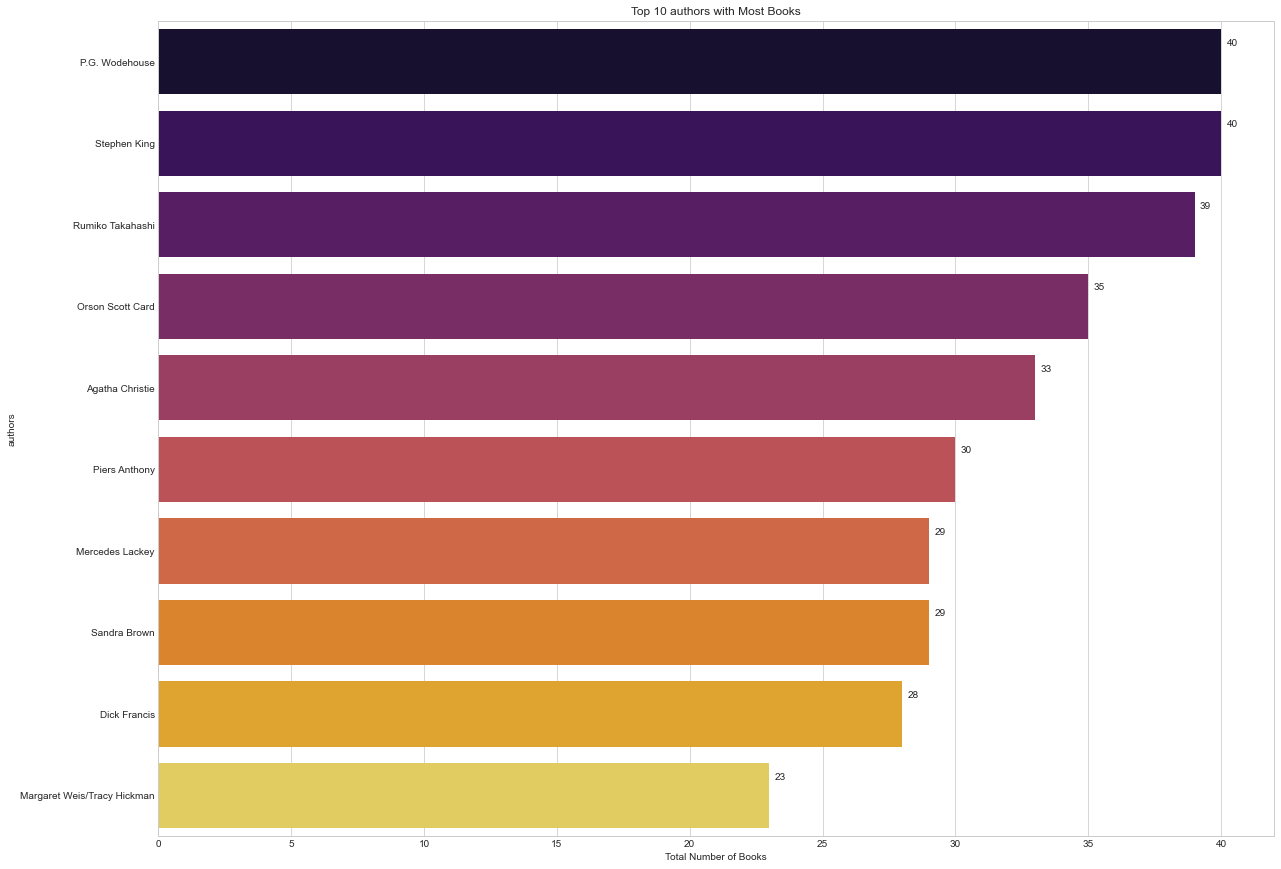

In [83]:
plt.figure(figsize=(20, 15))

ax = sns.barplot(book_aut['title'], book_aut.index, palette='inferno')
ax.set_title("Top 10 authors with Most Books")
ax.set_xlabel("Total Number of Books")

total = []

for i in ax.patches:
    total.append(i.get_width())
    
totals = sum(total)

for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2, str(round(i.get_width())))
    
plt.show()

In [84]:
most_rated = df.sort_values('ratings_count', ascending=False).head(10).set_index('title')

most_rated

,bookID,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
title,,,,,,,,,,,
Twilight (Twilight #1),41865,Stephenie Meyer,3.59,316015849,9.78E+12,eng,501,4597666,94265,09-06-2006,Little Brown and Company
The Hobbit or There and Back Again,5907,J.R.R. Tolkien,4.27,618260307,9.78E+12,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
The Catcher in the Rye,5107,J.D. Salinger,3.8,316769177,9.78E+12,eng,277,2457092,43499,1/30/2001,Back Bay Books
Angels & Demons (Robert Langdon #1),960,Dan Brown,3.89,1416524797,9.78E+12,eng,736,2418736,21303,04-01-2006,Pocket Books
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),5,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78E+12,eng,435,2339585,36325,05-01-2004,Scholastic Inc.
Harry Potter and the Chamber of Secrets (Harry Potter #2),15881,J.K. Rowling/Mary GrandPré,4.42,439064864,9.78E+12,eng,341,2293963,34692,06-02-1999,Arthur A. Levine Books / Scholastic Inc.
Harry Potter and the Order of the Phoenix (Harry Potter #5),2,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78E+12,eng,870,2153167,29221,09-01-2004,Scholastic Inc.
The Fellowship of the Ring (The Lord of the Rings #1),34,J.R.R. Tolkien,4.36,618346252,9.78E+12,eng,398,2128944,13670,09-05-2003,Houghton Mifflin Harcourt
Animal Farm,7613,George Orwell/Boris Grabnar/Peter Škerl,3.93,452284244,9.78E+12,eng,122,2111750,29677,05-06-2003,NAL


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


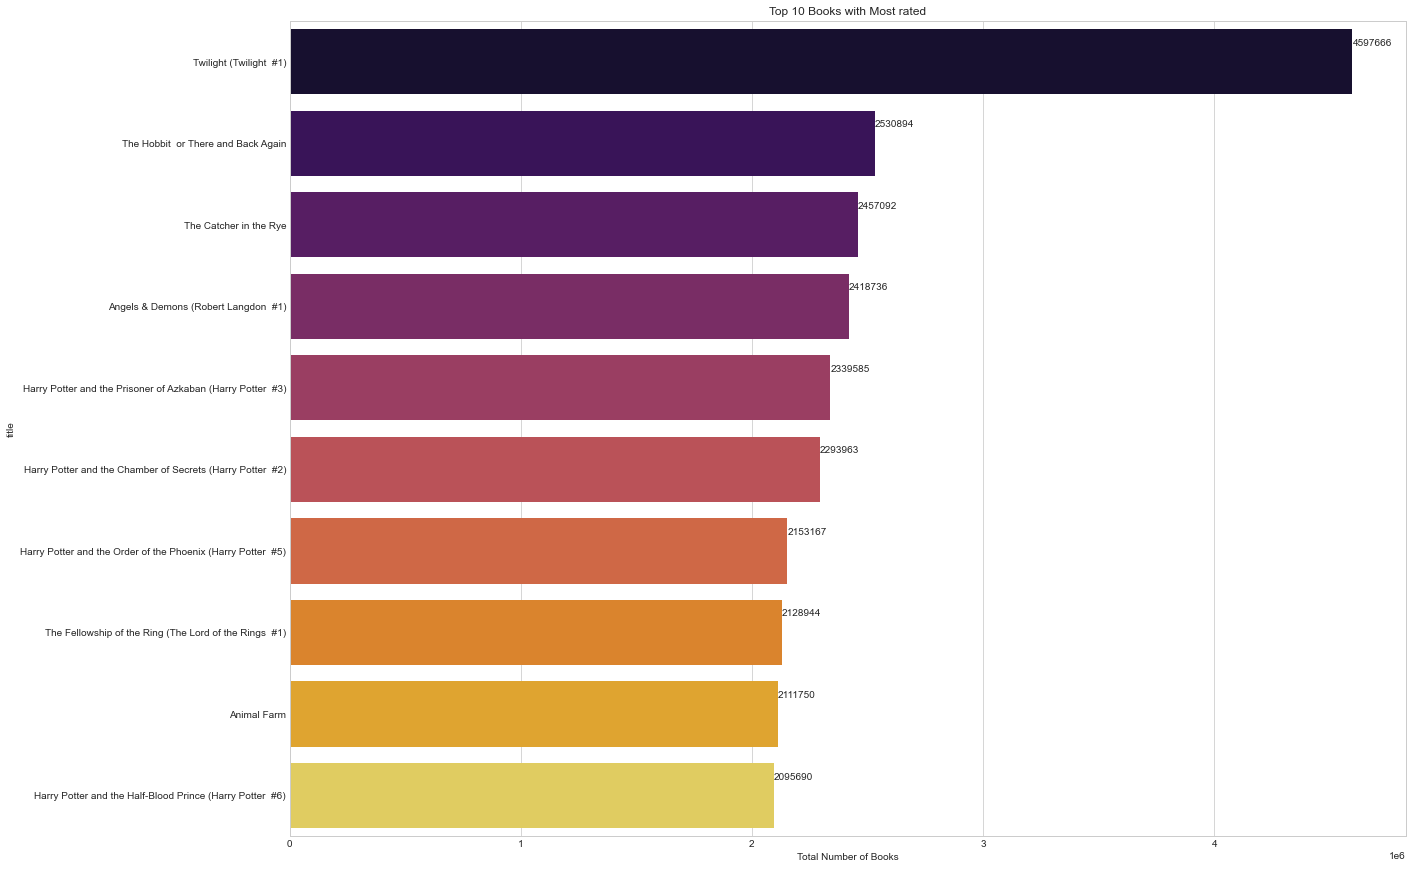

In [85]:
plt.figure(figsize=(20, 15))

ax = sns.barplot(most_rated['ratings_count'], most_rated.index, palette='inferno')
ax.set_title("Top 10 Books with Most rated")
ax.set_xlabel("Total Number of Books")

total = []

for i in ax.patches:
    total.append(i.get_width())
    
totals = sum(total)

for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2, str(round(i.get_width())))
    
plt.show()

In [89]:
df = df.sort_values('average_rating').reset_index()

df = df.iloc[4:]

In [91]:
df.reset_index()

,level_0,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,4,11105,9337,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,0.0,1932206108,9.78E+12,eng,228,0,0,01-01-2004,Frederick P. Lenz Foundation for American Budd...
1,5,11106,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.0,1932206086,9.78E+12,eng,304,0,0,01-01-2003,Frederick P. Lenz Foundation for American Budd...
2,6,11107,10200,Venac sonetnih venaca; Puževa srma,Dobrica Erić,0.0,8644101277,9.79E+12,srp,222,0,0,01-01-1996,"Izdavačka agencija ""Draganić"""
3,7,11108,12712,Brodie's notes on Aldous Huxley's brave new world,Graham Handley,0.0,333581296,9.78E+12,eng,71,0,0,8/20/1992,Macmillan
4,8,11109,15186,American Film Guide,Frank N. Magill,0.0,893562505,9.78E+12,eng,5,0,0,01-01-1983,Salem Press Inc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,288,23,39580,The American Campaign: U.S. Presidential Campa...,James E. Campbell,5.0,089096940X,9.78E+12,eng,314,0,0,05-01-2000,Texas A&M University Press
285,289,24,39829,His Princess Devotional: A Royal Encounter Wit...,Sheri Rose Shepherd,5.0,1590529626,9.78E+12,eng,240,2,0,10/16/2007,Multnomah
286,290,25,41639,Bill Gates: Computer Legend (Famous Lives),Sara Barton-Wood,5.0,739844326,9.78E+12,eng,48,0,0,11-01-2001,Raintree
287,291,15,20957,Colossians and Philemon: A Critical and Exeget...,R. McL. Wilson,5.0,567044718,9.78E+12,eng,512,1,0,12-07-2005,T&T Clark Int'l


In [96]:
df = df[df['average_rating'] != 'text']

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'average_rating')

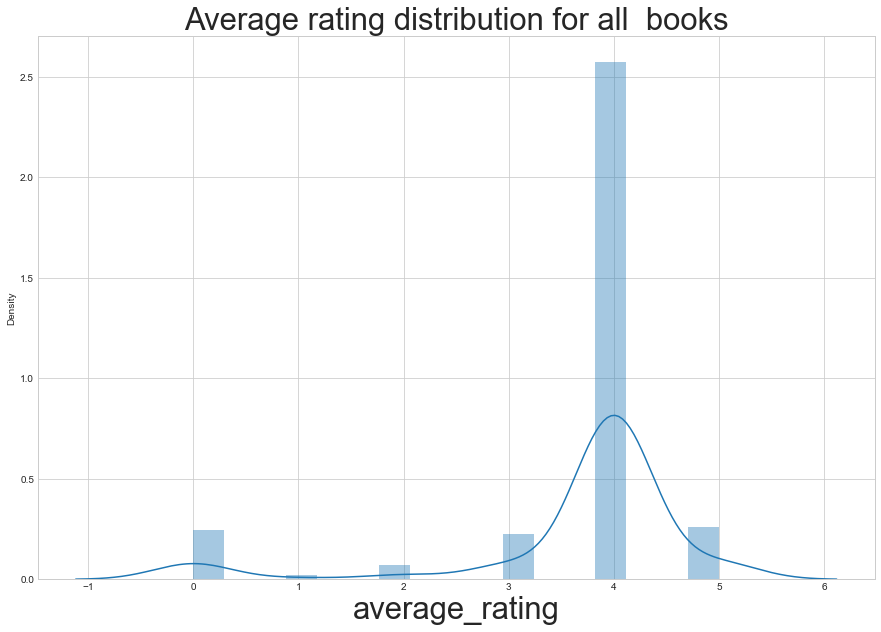

In [97]:
df['average_rating'] = df['average_rating'].astype(float)

fig, ax = plt.subplots(figsize=[15, 10])

sns.distplot(df["average_rating"], ax=ax)
ax.set_title('Average rating distribution for all  books', fontsize=31)
ax.set_xlabel('average_rating', fontsize=31)

In [98]:
df.tail(50)

,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
243,4803,13143,Pop Goes the Weasel (Alex Cross #5),James Patterson,4.0,446608815,9.78E+12,eng,461,52093,985,10-01-2000,TIme Warner Books
244,4804,13375,A Complicated Kindness (Bookclub-In-A-Box),Marilyn Herbert/Miriam Toews,4.0,1897082274,9.78E+12,eng,80,39,1,8/30/2006,Bookclub-In-A-Box
245,4831,19148,The Divine Comedy Vol. I: Inferno,Dante Alighieri/Mark Musa,4.0,140444416,9.78E+12,eng,432,305,19,11/28/1984,Penguin Classics
246,4806,13509,Lies My Teacher Told Me about Christopher Colu...,James W. Loewen,4.0,1565840089,9.78E+12,eng,48,227,15,10-01-2006,New Press
247,4807,13722,Cromartie High School Vol. 01,Eiji Nonaka/Brendan Frayne,4.0,141390257X,9.78E+12,eng,158,393,41,03-01-2005,ADV Manga
248,4808,13814,Into a Dark Realm (The Darkwar Saga #2),Raymond E. Feist,4.0,60792809,9.78E+12,eng,319,9291,97,3/27/2007,EOS
249,4809,14092,Prétear Vol. 2 (Prétear #2),Junichi Satō/Kaori Naruse,4.0,141390145X,9.78E+12,eng,182,347,17,8/24/2004,ADV Manga
250,4810,14249,Prodigal Summer,Barbara Kingsolver,4.0,60959037,9.78E+12,eng,444,88241,5652,10/16/2001,Harper Perennial
251,4811,14385,The Price of Pleasure (Sutherland Brothers #2),Kresley Cole,4.0,743466500,9.78E+12,en-US,353,118,5,07-01-2004,Pocket Books
252,4812,14386,If You Dare (MacCarrick Brothers #1),Kresley Cole,4.0,1416503595,9.78E+12,eng,349,10615,450,05-01-2005,Pocket Books


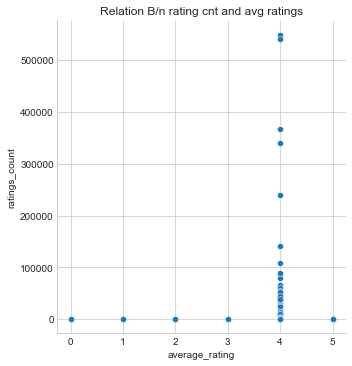

In [102]:
ax = sns.relplot(data=df, x="average_rating", y="ratings_count")

plt.title("Relation B/n rating cnt and avg ratings")
ax.set_axis_labels("average_rating", "ratings_count")